In [1]:
# READ SCRAPED TEXT AND BUILD TF-IDF
import pandas as pd
import nltk as nl
import numpy as np
from nltk.tokenize import word_tokenize
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
# Download corpora if necessary: nl.download()

# LOAD DATA OBTAINED BY SCRAPING
ITU_text = pd.read_csv("ITU_links_text.csv",sep='\t', encoding='utf-8', index_col=0)

#Processing of the data
stop_words = get_stop_words('en')
st = PorterStemmer()
docs = pd.Series(np.zeros(ITU_text.shape[0]))
tokens = [] #List of all words.

for i, line in enumerate(ITU_text['Text']):
    #Tokenize the data:
    doc_i = word_tokenize(line.lower())
    #Remove non-alphabetic characters:
    doc_i = [tok for tok in doc_i if tok.isalpha()]
    #Remove stopwords using a list of your choice:
    doc_i = [tok for tok in doc_i if tok not in stop_words]
    #Stem the data using the Porter stemmer:
    doc_i = [st.stem(tok) for tok in doc_i]

    tokens.extend(doc_i)
    docs.ix[i] = doc_i

result = []
for i in range(0,len(docs)):
    str1 = ' '.join(docs.ix[i])
    result.append(str1)

# Tf-idf
transformer = TfidfVectorizer(analyzer = 'word',tokenizer = word_tokenize,lowercase = True,stop_words = 'english',max_features=5000)
X_tfidf = transformer.fit_transform(result)
feature_names = transformer.get_feature_names()
dense = X_tfidf.todense()
denselist = dense.tolist()
# Convert to pandas for ease of operation
X = pd.DataFrame(denselist, columns=feature_names)

In [2]:
# APPLY ALL DICTIONARIES AND RECORD RESULTS

# Load dictionaries
test = pd.read_csv("dictionaries.csv",sep='\t',header=None, index_col=0)
dictionaries = np.array(test)

# Apply to corpus
results = pd.DataFrame(index=X.index.values,columns=["Dictionary "+str(1+i) for i in range(5)])
for i in range(5): 
    dic = X[[x for x in X.columns if x in dictionaries[i]]]
    results.ix[:,i] = np.array(dic.sum(axis=1)/X.values.sum(axis=1))

maxs = results.idxmax(axis=1)
intsty = results.max(axis=1)
results["Main_topic"] = maxs
results["Intensity"] = intsty
results.ix[results["Intensity"]< 0.000001,5] = "None"

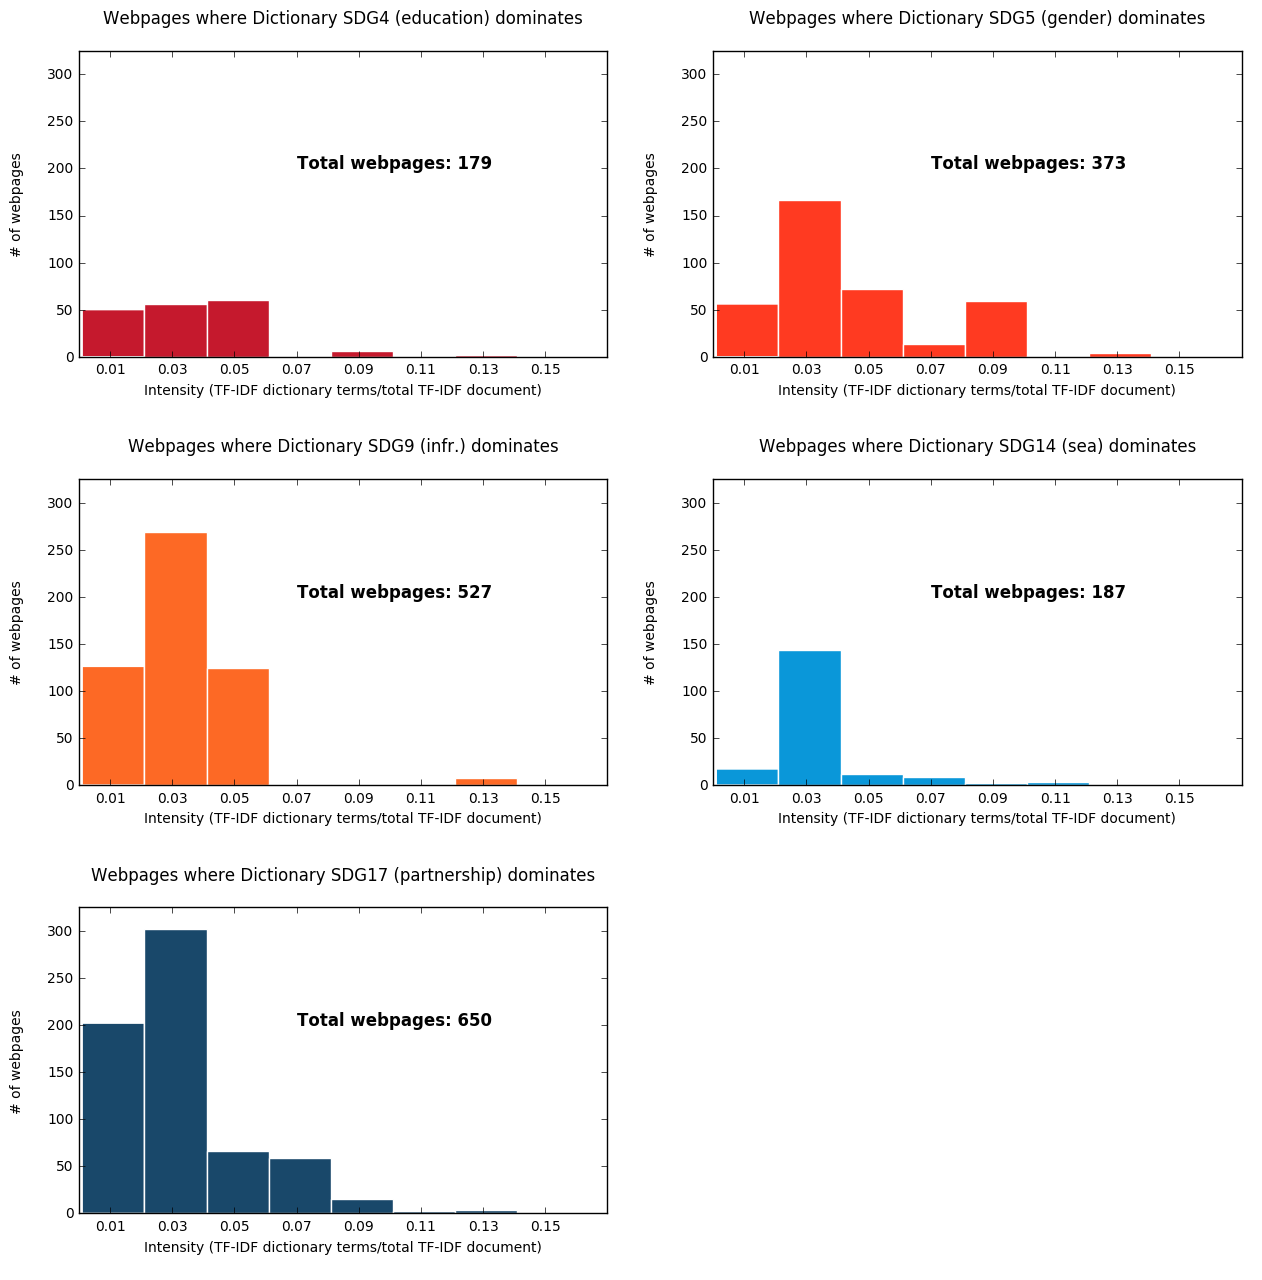

In [3]:
# PLOT SOME RESULTS - HISTOGRAMS
import matplotlib.pyplot as plt
import plotly.plotly as py

fig, ax = plt.subplots(3,2, figsize=(15,15))
plt.subplots_adjust(hspace=0.4)
nbin=np.arange(0.001,0.16,0.02)
col=['#c5192d','#ff3a21','#fd6925','#0A97d9','#19486a','#d3d3d3']
labels=['SDG4 (education)','SDG5 (gender)','SDG9 (infr.)','SDG14 (sea)','SDG17 (partnership)','None']

# first plot
xs = np.array(results[results["Main_topic"]=="Dictionary 1"]["Intensity"])
ax[0,0].hist(xs,edgecolor="w",color=col[0],bins=nbin)
ax[0,0].set_ylim([0,325])
ax[0,0].set_xlim([0,0.17])
ax[0,0].set_title("Webpages where Dictionary %s dominates\n" %labels[0])
ax[0,0].set_xlabel("Intensity (TF-IDF dictionary terms/total TF-IDF document)")
ax[0,0].set_ylabel("# of webpages\n")
ax[0,0].set_xticks(np.arange(0.01, 0.17, 0.02))
ax[0,0].annotate('Total webpages: %d' %len(xs) , xy=(0.07,200),size=12,weight='bold')

# second plot
xs = np.array(results[results["Main_topic"]=="Dictionary 2"]["Intensity"])
ax[0,1].hist(xs,edgecolor="w",color=col[1],bins=nbin)
ax[0,1].set_ylim([0,325])
ax[0,1].set_xlim([0,0.17])
ax[0,1].set_title("Webpages where Dictionary %s dominates\n" %labels[1])
ax[0,1].set_xlabel("Intensity (TF-IDF dictionary terms/total TF-IDF document)")
ax[0,1].set_ylabel("# of webpages\n")
ax[0,1].set_xticks(np.arange(0.01, 0.17, 0.02))
ax[0,1].annotate('Total webpages: %d' %len(xs) , xy=(0.07,200),size=12,weight='bold')

# third plot
xs = np.array(results[results["Main_topic"]=="Dictionary 3"]["Intensity"])
ax[1,0].hist(xs,edgecolor="w",color=col[2],bins=nbin)
ax[1,0].set_ylim([0,325])
ax[1,0].set_xlim([0,0.17])
ax[1,0].set_title("Webpages where Dictionary %s dominates\n" %labels[2])
ax[1,0].set_xlabel("Intensity (TF-IDF dictionary terms/total TF-IDF document)\n")
ax[1,0].set_ylabel("# of webpages\n")
ax[1,0].set_xticks(np.arange(0.01, 0.17, 0.02))
ax[1,0].annotate('Total webpages: %d' %len(xs) , xy=(0.07,200),size=12,weight='bold')

# fourth plot
xs = np.array(results[results["Main_topic"]=="Dictionary 4"]["Intensity"])
ax[1,1].hist(xs,edgecolor="w",color=col[3],bins=nbin)
ax[1,1].set_ylim([0,325])
ax[1,1].set_xlim([0,0.17])
ax[1,1].set_title("Webpages where Dictionary %s dominates\n" %labels[3])
ax[1,1].set_xlabel("Intensity (TF-IDF dictionary terms/total TF-IDF document)\n")
ax[1,1].set_ylabel("# of webpages\n")
ax[1,1].set_xticks(np.arange(0.01, 0.17, 0.02))
ax[1,1].annotate('Total webpages: %d' %len(xs) , xy=(0.07,200),size=12,weight='bold')

# fifth plot
xs = np.array(results[results["Main_topic"]=="Dictionary 5"]["Intensity"])
ax[2,0].hist(xs,edgecolor="w",color=col[4],bins=nbin)
ax[2,0].set_ylim([0,325])
ax[2,0].set_xlim([0,0.17])
ax[2,0].set_title("Webpages where Dictionary %s dominates\n" %labels[4])
ax[2,0].set_xlabel("Intensity (TF-IDF dictionary terms/total TF-IDF document)\n")
ax[2,0].set_ylabel("# of webpages\n")
ax[2,0].set_xticks(np.arange(0.01, 0.17, 0.02))
ax[2,0].annotate('Total webpages: %d' %len(xs) , xy=(0.07,200),size=12,weight='bold')

ax[2,1].axis("off")

plt.show() # TO SAVE IT REPLACE WITH plt.savefig('Histograms_topics.pdf')

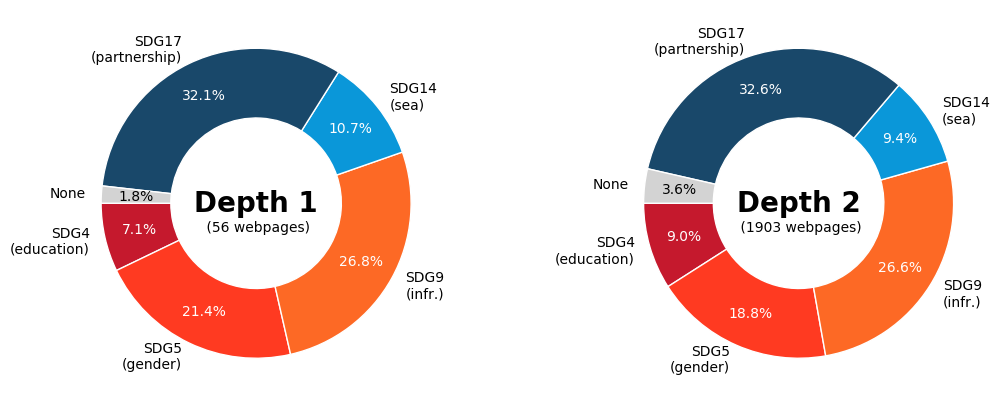

In [4]:
# PLOT SOME RESULTS - DONUTS

#Get data
results['depth']=ITU_text['depth']
donut1=results.ix[results['depth']==1,5:7].groupby('Main_topic').count()
donut2=results.ix[results['depth']==2,5:7].groupby('Main_topic').count()

#Format labels to make them shorter
short_labels=np.zeros(6,dtype='object')
for i,lab in enumerate(labels):
    if i != 5:
        pos=lab.find(' ')
        short_labels[i]= lab[:pos]+"\n"+lab[pos+1:]
    else:
        short_labels[i]=lab

#Create and adjsut plot grid
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
plt.subplots_adjust(wspace=0.4)

#Draw 1st donut
ax1.axis('equal')
width = 0.45
kwargs = dict(colors=col, startangle=180,pctdistance=1-width/2,autopct='%1.1f%%')
outside, _, autotexts = ax1.pie(donut1['Intensity'].values, radius=1, labels=short_labels,**kwargs)
for i,autotext in enumerate(autotexts):
    if i !=5:
        autotext.set_color('white')
plt.setp( outside, width=width, edgecolor='white')
kwargs = dict(size=20, fontweight='bold', va='center')
ax1.text(0, 0, "Depth 1", ha='center', **kwargs)
ax1.text(0, 0, "\n\n\n (%d webpages)" %donut1.sum()[0], ha='center', size=10,va='center')

#Draw 2nd donut
ax2.axis('equal')
width = 0.45
kwargs = dict(colors=col, startangle=180,pctdistance=1-width/2,autopct='%1.1f%%')
outside, _, autotexts = ax2.pie(donut2['Intensity'].values, radius=1, labels=short_labels,**kwargs)
for i,autotext in enumerate(autotexts):
    if i !=5:
        autotext.set_color('white')
plt.setp( outside, width=width, edgecolor='white')
kwargs = dict(size=20, fontweight='bold', va='center')
ax2.text(0, 0, "Depth 2", ha='center', **kwargs)
ax2.text(0, 0, "\n\n\n (%d webpages)" %donut2.sum()[0], ha='center', size=10,va='center')

plt.show()  # TO SAVE IT REPLACE WITH plt.savefig('donuts.pdf')

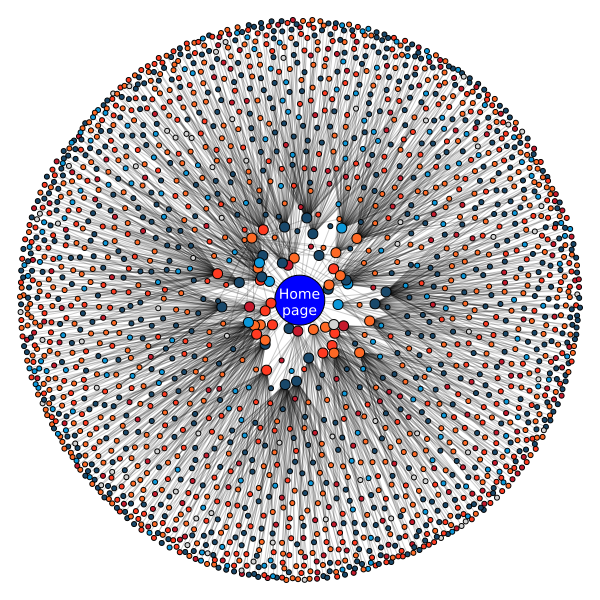

In [79]:
# PLOT SOME RESULTS - NETWORK GRAPH

import igraph as ig # requires igraph: sudo pip install python-igraph 
# igraph also requires cairo graphic library, in instance was already installed, not in my computer
import matplotlib.pyplot as plt
import numpy as np
import random


# combine network data and dictionary results
ITU_text['Main_topic'] = np.array(results['Main_topic'])
ITU_text['Intensity'] = np.array(results['Intensity'])
# we have some blanks in the IDs because we filtered at the end of the scrape script
# the webpages with too few rows -> we need to reset ids to make the graph rendering nice
ITU_text['new_id']= range(len(results))
id_change = dict(zip(ITU_text.id, ITU_text.new_id))
id_change[-1]=-1


# create color scale    
color_scale = { 'Dictionary 1' : col[0], 'Dictionary 2' : col[1],'Dictionary 3':col[2],'Dictionary 4':col[3],
              'Dictionary 5':col[4],'None':col[5],np.nan:col[5]}

## PLOT GRAPH ALL ITU WEBPAGES DEPTH 1 and 2
links = []
colors = []
sizes = []
depth= []

# BUILD LIST OF EDGES & NODES
# initial node properties (ITU Home page)
colors.append("blue")
sizes.append(50)
depth.append(0)
#subsequent nodes/links
for row in ITU_text.itertuples():
    if row[1]<3:
        links.append((id_change[int(row[4])]+1,id_change[int(row[2])]+1))
        depth.append(row[1])
        if row[1] == 1:
            colors.append(color_scale[row[6]])
            sizes.append(10)
        elif row[1] == 2:
            colors.append(color_scale[row[6]])
            sizes.append(5)
nodes = list(range(len(links)+1))

# CREATE GRAPH
g = ig.Graph()
g.add_vertices(len(nodes))
g.add_edges(links)
g.vs['color']=colors
g.vs['depth'] = depth
g.vs['size']=sizes
random.seed(110)
layout = g.layout("kk")
g.vs[0]['label']="Home\npage"
g.vs[0]['label_color']="white"

# # ensure no overlapping with initial node
for i, dot in enumerate(layout):
    if i != 0 and abs(dot[0]-layout[0][0]) < 0.3 and abs(dot[1]-layout[0][1]) < 0.3:
        k=min(abs(0.4/(0.01+dot[0]-layout[0][0])),
                 abs((0.4/(0.01+dot[1]-layout[0][1]))))
        layout[i] = list([layout[0][0]+k*(dot[0]-layout[0][0]),layout[0][1]+k*(dot[1]-layout[0][1])])

ig.plot(g, "ITU_links_graph_final.pdf", layout = layout, edge_color="rgba(1,1,1,0.2)")
ig.plot(g, "ITU_links_graph_final.svg", layout = layout, edge_color="rgba(1,1,1,0.2)")
ig.plot(g, "ITU_links_graph_final.png", layout = layout, edge_color="rgba(1,1,1,0.2)")
